In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read and convert datasets into dataframes using pandas

# Read child mortality dataset
df_child = pd.read_csv('datasets/child-mortality-by-income-level-of-country.csv')

# Read GDP per capita dataset
df_gdp = pd.read_csv('datasets/imf_gdp_per_capita.csv', encoding='latin1')

# Read WHO health expenditure dataset
df_who = pd.read_csv('datasets/WHO_health_expenditure_per_capita.csv', encoding='latin1')

# Read income classification dataset
df_income_class = pd.read_excel('datasets/income_classification.xlsx')

In [3]:
# Filtering out the rows with years between 2000 and 2019 (inclusive) from the original dataframe
df_child_filtered = df_child[(df_child['Year'] >= 2000) & (df_child['Year'] <= 2019)].reset_index(drop=True)

# Renaming the column 'Mortality rate, under-5 (per 1,000 live births)' to 'Mortality'
df_child_filtered = df_child_filtered.rename(columns={'Mortality rate, under-5 (per 1,000 live births)': 'Mortality', 'Entity':'Countries'})

# Converting the 'Mortality' column to numeric, replacing non-numeric values with NaN
df_child_filtered['Mortality'] = pd.to_numeric(df_child_filtered['Mortality'], errors='coerce')

# Display the top 5 rows of the filtered and modified dataframe
df_child_filtered.head(5)

,Countries,Code,Year,Mortality
0,Afghanistan,AFG,2000,12.92
1,Afghanistan,AFG,2001,12.52
2,Afghanistan,AFG,2002,12.11
3,Afghanistan,AFG,2003,11.69
4,Afghanistan,AFG,2004,11.26


## Child Mortality Dataset Filtering
<ul>
    <li>Data from the years 2000 to 2019 (inclusive) has been included.</li>
    <li>Columns have been renamed for improved readability.</li>
    <li>Mortality column values have been converted into numerical format.</li>
</ul>

In [4]:
# Renaming the column 'GDP per capita, current prices\n (U.S. dollars per capita)' to 'Countries'
df_gdp_filtered = df_gdp.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)':'Countries'})

# Converting numeric columns to numeric type, replacing non-numeric values with NaN
for col in df_gdp_filtered.columns[1:]:
    df_gdp_filtered[col] = pd.to_numeric(df_gdp_filtered[col], errors='coerce')

# Display the top 5 rows of the filtered and modified dataframe
df_gdp_filtered.head(5)

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,233.433,233.755,254.259,294.396,320.674,381.502,447.746,...,631.490,714.700,784.611,754.402,746.922,705.597,617.126,635.789,582.323,586.204
1,Albania,1127.640,1283.573,1425.125,1846.119,2373.580,2673.773,2972.745,3595.053,4370.562,...,4097.833,4439.890,4248.909,4415.600,4584.919,3953.611,4124.405,4525.887,5257.714,5345.058
2,Algeria,1794.695,1768.577,1806.860,2128.386,2636.479,3141.027,3508.959,3986.564,4943.502,...,4480.719,5447.600,5575.653,5477.055,5466.329,4153.322,3918.941,4014.707,4106.997,3953.402
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49030.229,51957.313,45713.970,45630.195,46299.282,38877.485,39595.317,40017.741,42229.903,40688.491
4,Angola,681.129,645.145,872.658,982.806,1254.696,1900.724,2597.964,3121.349,4081.718,...,3586.664,4608.155,5083.827,5228.511,5371.217,4130.930,3468.518,4039.300,3240.858,2612.246


## GDP per capita Dataset Filtering
<ul>
    <li>Columns have been renamed for improved readability.</li>
    <li>Values in the all the year columns have been converted into numerical format.</li>
</ul>

In [5]:
# Filtering out rows with index 1 onwards and resetting the index
df_who_filtered = df_who.loc[1:].reset_index(drop=True)

# Dropping the column with the name 'Unnamed: 2'
df_who_filtered = df_who_filtered.drop(columns=['Unnamed: 2'])

# Sorting the dataframe by the 'Countries' column and resetting the index
df_who_filtered = df_who_filtered.sort_values(by='Countries').reset_index(drop=True)

# Converting numeric columns to numeric type, replacing non-numeric values with NaN
for col in df_who_filtered.columns[2:]:
    df_who_filtered[col] = pd.to_numeric(df_who_filtered[col], errors='coerce')

# Display the top 5 rows of the filtered and modified dataframe
df_who_filtered.head(5)

,Countries,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Current Health Expenditure (CHE) per Capita in...,NaN,NaN,17.0,18.0,21.0,25.0,29.0,33.0,...,47.0,52.0,53.0,56.0,60.0,60.0,61.0,67.0,71.0,74.0
1,Albania,Current Health Expenditure (CHE) per Capita in...,65.0,74.0,79.0,111.0,142.0,155.0,168.0,205.0,...,255.0,272.0,260.0,278.0,295.0,NaN,NaN,NaN,NaN,NaN
2,Algeria,Current Health Expenditure (CHE) per Capita in...,62.0,67.0,67.0,76.0,93.0,101.0,117.0,152.0,...,230.0,288.0,337.0,333.0,361.0,293.0,262.0,260.0,258.0,251.0
3,Andorra,Current Health Expenditure (CHE) per Capita in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Current Health Expenditure (CHE) per Capita in...,13.0,29.0,29.0,35.0,50.0,54.0,70.0,93.0,...,97.0,122.0,122.0,143.0,131.0,108.0,94.0,113.0,84.0,69.0


## Health Expenditure Dataset Filtering
<ul>
    <li>Empty rows and columns are filtered out.</li>
    <li>Sorted in ascending order by country names.</li>
    <li>Values in the all the year columns have been converted into numerical format.</li>
</ul>

In [6]:
# Display the df_income_class dataframe

display(df_income_class)

,Data for calendar year :,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Low income (L),<= 755,<= 745,<= 735,<= 765,<= 825,<= 875,<= 905,<= 935,<= 975,...,"<= 1,005","<= 1,025","<= 1,035","<= 1,045","<= 1,045","<= 1,025","<= 1,005",<= 995,"<= 1,025","<= 1,035"
1,Lower middle income (LM),"756-2,995","746-2,975","736-2,935","766-3,035","826-3,255","876-3,465","906-3,595","936-3,705","976-3,855",...,"1,006-3,975","1,026-4,035","1,036-4,085","1,046-4,125","1,046-4,125","1,026-4,035","1,006-3,955","996-3,895","1,026-3,995","1,036 - 4,045"
2,Upper middle income (UM),"2,996-9,265","2,976-9,205","2,936-9,075","3,036-9,385","3,256-10,065","3,466-10,725","3,596-11,115","3,706-11,455","3,856-11,905",...,"3,976-12,275","4,036-12,475","4,086-12,615","4,126-12,745","4,126-12,735","4,036-12,475","3,956-12,235","3,896-12,055","3,996-12,375","4,046 - 12,535"
3,High income (H),"> 9,265","> 9,205","> 9,075","> 9,385","> 10,065","> 10,725","> 11,115","> 11,455","> 11,905",...,"> 12,275","> 12,475","> 12,615","> 12,745","> 12,735","> 12,475","> 12,235","> 12,055","> 12,375","> 12,535"


In [7]:
# Creating a new DataFrame df_income_class_filtered
df_income_class_filtered = df_income_class.copy()

# Iterate over columns from the second column to the last
for col in df_income_class.columns[1:]:
    # Process each income class and update the DataFrame
    for row, income_class in enumerate(['Low', 'Lower middle', 'Upper middle', 'High']):
        # Split the values based on the income class type
        values = df_income_class[col][row].split('<=' if row == 0 else '-' if row in [1, 2] else '> ')
        
        # Clean and convert values to integers
        cleaned_values = [int(value.replace(',', '')) if value else 0 for value in values]

        # Handle special case for 'High' income
        if row == 3:
            # Set lower bound to 1000000000 and increment upper bound by 1
            cleaned_values = [cleaned_values[1] + 1, 1000000000]

        # Update the DataFrame with the cleaned values
        df_income_class_filtered.at[row, col] = cleaned_values

# Rename the column 'Data for calendar year :' to 'Income Class'
df_income_class_filtered = df_income_class_filtered.rename(columns={'Data for calendar year :': 'Income Class'})

# Update the 'Income Class' column with new class indicator
df_income_class_filtered['Income Class'] = ['Low', 'Lower Middle', 'Upper Middle', 'High']

# Display the resulting DataFrame
display(df_income_class_filtered)


,Income Class,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Low,"[0, 755]","[0, 745]","[0, 735]","[0, 765]","[0, 825]","[0, 875]","[0, 905]","[0, 935]","[0, 975]",...,"[0, 1005]","[0, 1025]","[0, 1035]","[0, 1045]","[0, 1045]","[0, 1025]","[0, 1005]","[0, 995]","[0, 1025]","[0, 1035]"
1,Lower Middle,"[756, 2995]","[746, 2975]","[736, 2935]","[766, 3035]","[826, 3255]","[876, 3465]","[906, 3595]","[936, 3705]","[976, 3855]",...,"[1006, 3975]","[1026, 4035]","[1036, 4085]","[1046, 4125]","[1046, 4125]","[1026, 4035]","[1006, 3955]","[996, 3895]","[1026, 3995]","[1036, 4045]"
2,Upper Middle,"[2996, 9265]","[2976, 9205]","[2936, 9075]","[3036, 9385]","[3256, 10065]","[3466, 10725]","[3596, 11115]","[3706, 11455]","[3856, 11905]",...,"[3976, 12275]","[4036, 12475]","[4086, 12615]","[4126, 12745]","[4126, 12735]","[4036, 12475]","[3956, 12235]","[3896, 12055]","[3996, 12375]","[4046, 12535]"
3,High,"[9266, 1000000000]","[9206, 1000000000]","[9076, 1000000000]","[9386, 1000000000]","[10066, 1000000000]","[10726, 1000000000]","[11116, 1000000000]","[11456, 1000000000]","[11906, 1000000000]",...,"[12276, 1000000000]","[12476, 1000000000]","[12616, 1000000000]","[12746, 1000000000]","[12736, 1000000000]","[12476, 1000000000]","[12236, 1000000000]","[12056, 1000000000]","[12376, 1000000000]","[12536, 1000000000]"


## Income Class Dataset Filtering
<ul>
    <li>String values representing income class ranges have been stripped and converted into numerical format.</li>
    <li>Both lower and upper bounds are inserted as list.</li>
</ul>

In [8]:
# Creating a new dataframe by adding health expenditure to each year
merged_df = df_child_filtered.copy()

# Iterate over rows in df_child_filtered
for index, row in df_child_filtered.iterrows():
    country = row['Countries']
    year = row['Year']
        
    # Extract health expenditure, GDP, and income class for the given country and year
    health_expenditure = df_who_filtered.loc[df_who_filtered['Countries'] == country, str(year)].values
    gdp = df_gdp_filtered.loc[df_gdp_filtered['Countries'] == country, str(year)].values
    income_class = df_income_class_filtered[year]
    
    # Assuming 'Health Expenditure' should be added as a new column in merged_df
    merged_df.at[index, 'Health Expenditure'] = health_expenditure[0] if len(health_expenditure) > 0 else None
    
    # Assuming 'GDP' should be added as a new column in merged_df
    merged_df.at[index, 'GDP'] = gdp[0] if len(gdp) > 0 else None
    
    # Iterate over income classes and find the correct class for the given GDP value
    for i, income_range in income_class.items():
        if len(gdp) > 0 and gdp[0] >= income_range[0] and gdp[0] <= income_range[1]:
            merged_df.at[index, 'Income Class'] = df_income_class_filtered['Income Class'][i]
            

## Merge DataFrame
<ul>
    <li>The four dataframes are merged together to facilitate the analysis process.</li>
</ul>

In [9]:
# Display the first 5 rows of merged_df

merged_df.head(5)

,Countries,Code,Year,Mortality,Health Expenditure,GDP,Income Class
0,Afghanistan,AFG,2000,12.92,NaN,NaN,NaN
1,Afghanistan,AFG,2001,12.52,NaN,NaN,NaN
2,Afghanistan,AFG,2002,12.11,17.0,233.433,Low
3,Afghanistan,AFG,2003,11.69,18.0,233.755,Low
4,Afghanistan,AFG,2004,11.26,21.0,254.259,Low


In [10]:
# Calculate the number of missing values in each column of the merged_df DataFrame
missing_values = merged_df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Countries                0
Code                   280
Year                     0
Mortality                0
Health Expenditure    1579
GDP                    706
Income Class           706
dtype: int64


## Missing Data
<ul>
    <li>The Health Expenditure column has 1579 missing data.</li>
    <li>Both the GDP column and Income Class column has 706 missing data.</li>
</ul>

<b>Conclusion:</b>
The entries with missing data should be removed for proper analysis.

In [11]:
# Group by 'Countries' and calculate mean for 'Mortality', 'Health Expenditure', and 'GDP'
grouped_df = merged_df.dropna().groupby('Countries').mean().reset_index()

C:\Users\david\AppData\Local\Temp\ipykernel_19612\513626990.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = merged_df.dropna().groupby('Countries').mean().reset_index()


## Group Data
<ul>
    <li>The missing data are first removed from the dataframe.</li>
    <li>The dataframe is grouped by the country, i.e. all the countries will be divided into groups.</li>
    <li>The mean value for each group are calculated.</li>
</ul>

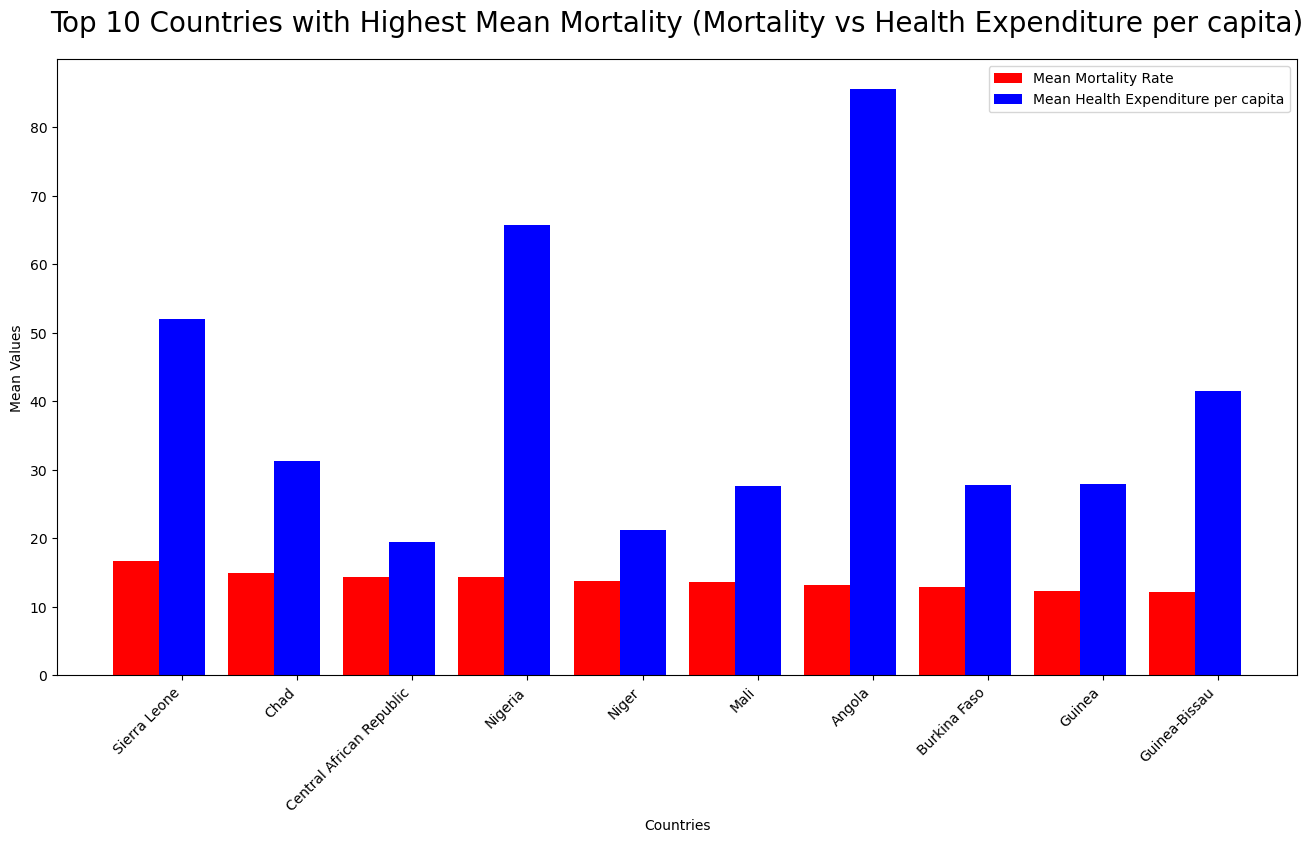

In [12]:
# Sort the DataFrame by 'Mortality' in descending order and select the top 10
top_10_mortality = grouped_df.sort_values(by='Mortality', ascending=False).head(10)

# Set the positions for the bars
bar_width = 0.40
r1 = np.arange(len(top_10_mortality))
r2 = [x + bar_width for x in r1]

# Plot side-by-side bar chart for the top 10 highest mortality countries
plt.figure(figsize=(16, 8))

plt.bar(r1, top_10_mortality['Mortality'], width=bar_width, label='Mean Mortality Rate', color='red')
plt.bar(r2, top_10_mortality['Health Expenditure'], width=bar_width, label='Mean Health Expenditure per capita', color='blue')

plt.xlabel('Countries')
plt.ylabel('Mean Values')
plt.title('Top 10 Countries with Highest Mean Mortality (Mortality vs Health Expenditure per capita)', fontsize=20, pad=20)
plt.xticks([r + bar_width for r in range(len(top_10_mortality))], top_10_mortality['Countries'], rotation=45, ha='right')
plt.legend()
plt.show()

# Top 10 Countries with Highest Mean Mortality<br>(Mortality vs Health Expenditure per capita)
<ul>
    <li>The average child mortality rate for children under 5 in these countries is approximately 14.235 per 1000.</li>
    <li>These countries spend on average USD 38.205 per capita on healthcare.</li>
</ul>

<b>Conclusion:</b>
These countries, which have the highest average mortality rates, spend too little on healthcare.

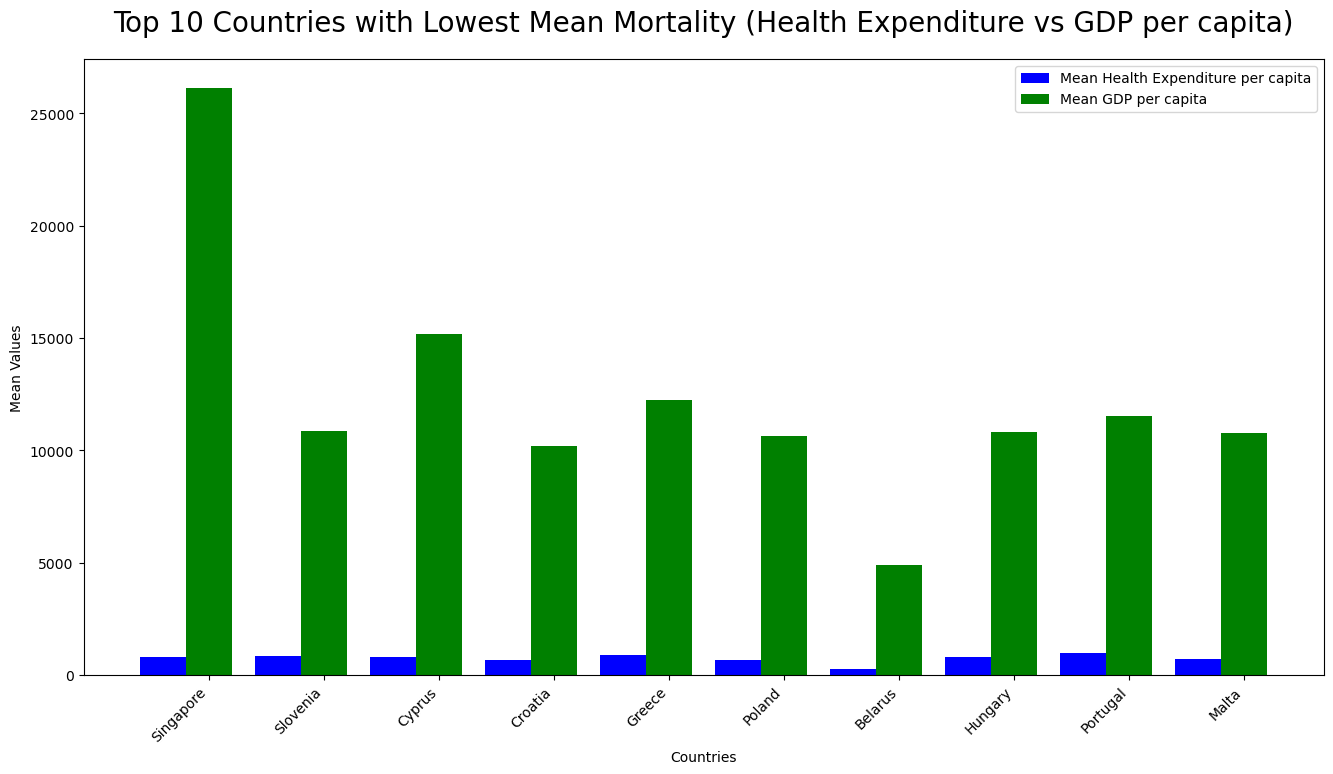

In [13]:
# Sort the DataFrame by 'Mortality' in descending order and select the top 10
bottom_10_mortality = grouped_df.sort_values(by='Mortality', ascending=True).head(10)

# Set the positions for the bars
bar_width = 0.40
r1 = np.arange(len(bottom_10_mortality))
r2 = [x + bar_width for x in r1]

# Plot side-by-side bar chart for the top 10 highest mortality countries
plt.figure(figsize=(16, 8))

plt.bar(r1, bottom_10_mortality['Health Expenditure'], width=bar_width, label='Mean Health Expenditure per capita', color='blue')
plt.bar(r2, bottom_10_mortality['GDP'], width=bar_width, label='Mean GDP per capita', color='green')

plt.xlabel('Countries')
plt.ylabel('Mean Values')
plt.title('Top 10 Countries with Lowest Mean Mortality (Health Expenditure vs GDP per capita)', fontsize=20, pad=20)
plt.xticks([r + bar_width for r in range(len(bottom_10_mortality))], bottom_10_mortality['Countries'], rotation=45, ha='right')
plt.legend()
plt.show()

# Top 10 Countries with Lowest Mean Mortality<br>(Health Expenditure vs GDP per capita)
<ul>
    <li>The average child mortality rate for children under 5 in these countries is approximately 0.313 per 1000.</li>
    <li>The average GDP per capita for these countries is USD 54,350.</li>
    <li>These countries spend around USD 4,252.10 per capita on healthcare.</li>
</ul>

<b>Conclusion:</b>
These countries, with the lowest average mortality rates, spend a significant amount on healthcare.

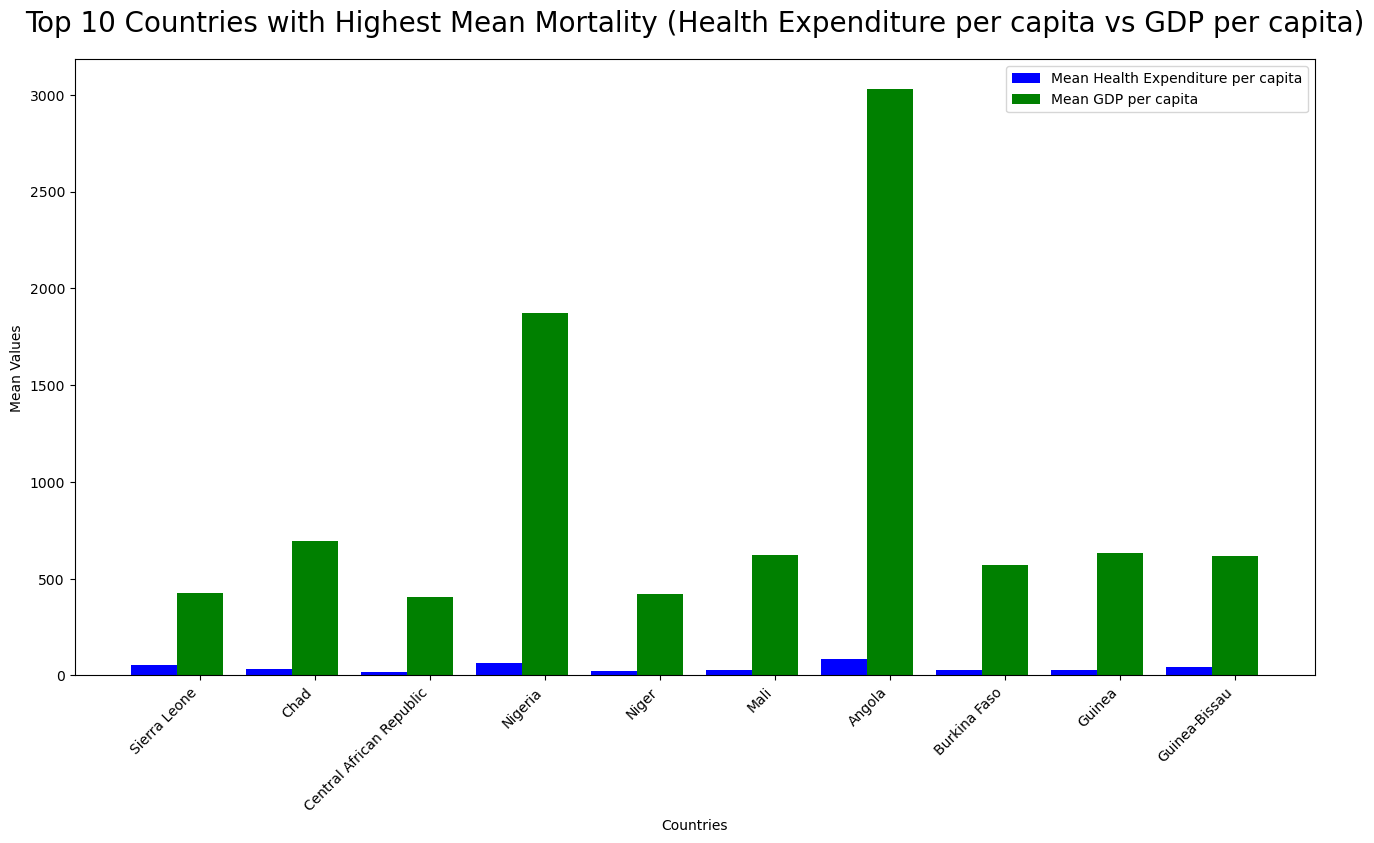

In [14]:
# Sort the DataFrame by 'Mortality' in descending order and select the top 10
top_10_mortality = grouped_df.sort_values(by='Mortality', ascending=False).head(10)

# Set the positions for the bars
bar_width = 0.40
r1 = np.arange(len(top_10_mortality))
r2 = [x + bar_width for x in r1]

# Plot side-by-side bar chart for the top 10 highest mortality countries
plt.figure(figsize=(16, 8))

plt.bar(r1, top_10_mortality['Health Expenditure'], width=bar_width, label='Mean Health Expenditure per capita', color='blue')
plt.bar(r2, top_10_mortality['GDP'], width=bar_width, label='Mean GDP per capita', color='green')


plt.xlabel('Countries')
plt.ylabel('Mean Values')
plt.title('Top 10 Countries with Highest Mean Mortality (Health Expenditure per capita vs GDP per capita)', fontsize=20, pad=20)
plt.xticks([r + bar_width for r in range(len(top_10_mortality))], top_10_mortality['Countries'], rotation=45, ha='right')
plt.legend()
plt.show()

# Top 10 Countries with Highest Mean Mortality<br>(Health Expenditure vs GDP per capita)
<ul>
    <li>The average child mortality rate for children under 5 in these countries is approximately 14.235 per 1000.</li>
    <li>The average GDP per capita for these countries is USD 928.32.</li>
    <li>These countries spend around USD 39.965 per capita on healthcare.</li>
</ul>

<b>Conclusion:</b>
These countries, with the highest average mortality rates, have very low income and spend very little on healthcare.

In [15]:
# Define the custom order for the 'Income Class' column
custom_order = ['Low', 'Lower Middle', 'Upper Middle', 'High']

# Convert 'Income Class' to a categorical variable with the custom order
merged_df['Income Class'] = pd.Categorical(merged_df['Income Class'], categories=custom_order, ordered=True)

<Figure size 1200x600 with 0 Axes>

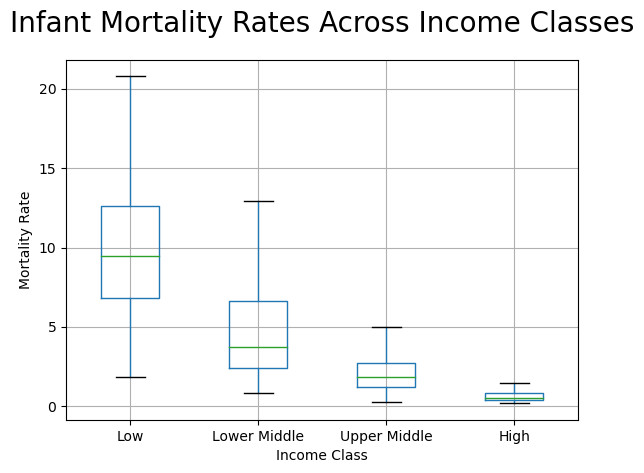

In [16]:
# Boxplot for Mortality
plt.figure(figsize=(12, 6))
merged_df.boxplot(column='Mortality', by='Income Class', showfliers=False)
plt.title('Infant Mortality Rates Across Income Classes', fontsize=20, pad=20)
plt.suptitle('')  # Remove default title
plt.xlabel('Income Class')
plt.ylabel('Mortality Rate')
plt.show()

# Infant Mortality Rates Across Income Classes
<ul>
    <li>The low-income class countries exhibit the highest infant mortality rates around 7-13 per 1000, and the data indicates a considerable dispersion in mortality rates within this income class.</li>
    <li>The lower-middle-class countries demonstrate a significant decrease in their infant mortality rate, ranging from around 3 to 6 per 1000 live births, compared to the low-income class.</li>
    <li>The upper-middle-class countries exhibit an even lower infant mortality rate, ranging from 2 to 3 per 1000 live births, surpassing the lower-middle-class countries.</li>
    <li>The high-income class countries demonstrate the lowest infant mortality rates, hovering around 1 per 1000 live births</li>
</ul>

<b>Conclusion:</b>
The trend indicates that as countries progress in income, there is a notable reduction in infant mortality rates, showcasing an association between economic development and improved infant health outcomes.

<Figure size 1200x600 with 0 Axes>

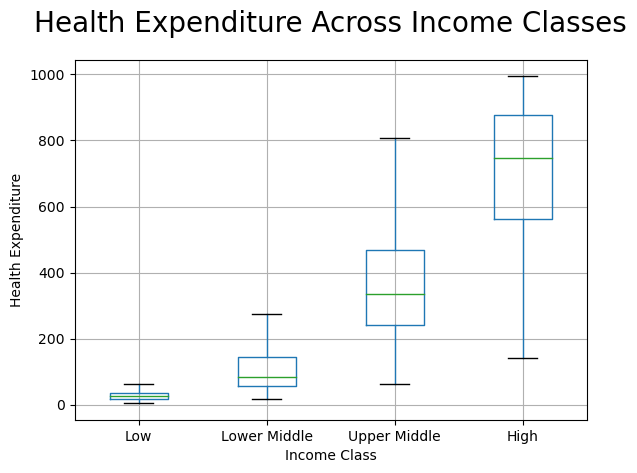

In [17]:
# Boxplot for Health Expenditure
plt.figure(figsize=(12, 6))
merged_df.boxplot(column='Health Expenditure', by='Income Class', showfliers=False)
plt.title('Health Expenditure Across Income Classes', fontsize=20, pad=20)
plt.suptitle('')
plt.xlabel('Income Class')
plt.ylabel('Health Expenditure')
plt.show()

# Health Expenditure Across Income Classes
<ul>
    <li>Low-income class countries typically allocate limited resources to health expenditure, with expenditure per capita values ranging in decimals.</li>
    <li>Lower-middle-class countries show a modest increase in health expenditure, with per capita values in hundreds, reflecting an improvement in healthcare investment compared to low-income class countries.</li>
    <li>Upper-middle-class countries demonstrate a further increase in health expenditure having per capita values near 500, indicating a higher commitment to healthcare resources and infrastructure.</li>
    <li>High-income class countries exhibit the highest health expenditure, with values ranging from 1000 to 4000 USD per capita, indicating a substantial investment in healthcare. This suggests a potential correlation between higher income levels and increased spending on healthcare, which may contribute to better health outcomes.</li>
</ul>
<b>Conclusion:</b>
The data suggests a positive correlation between income class and health expenditure, with higher-income countries allocating more resources to healthcare. This pattern implies a potential relationship between economic development and increased investment in health infrastructure.

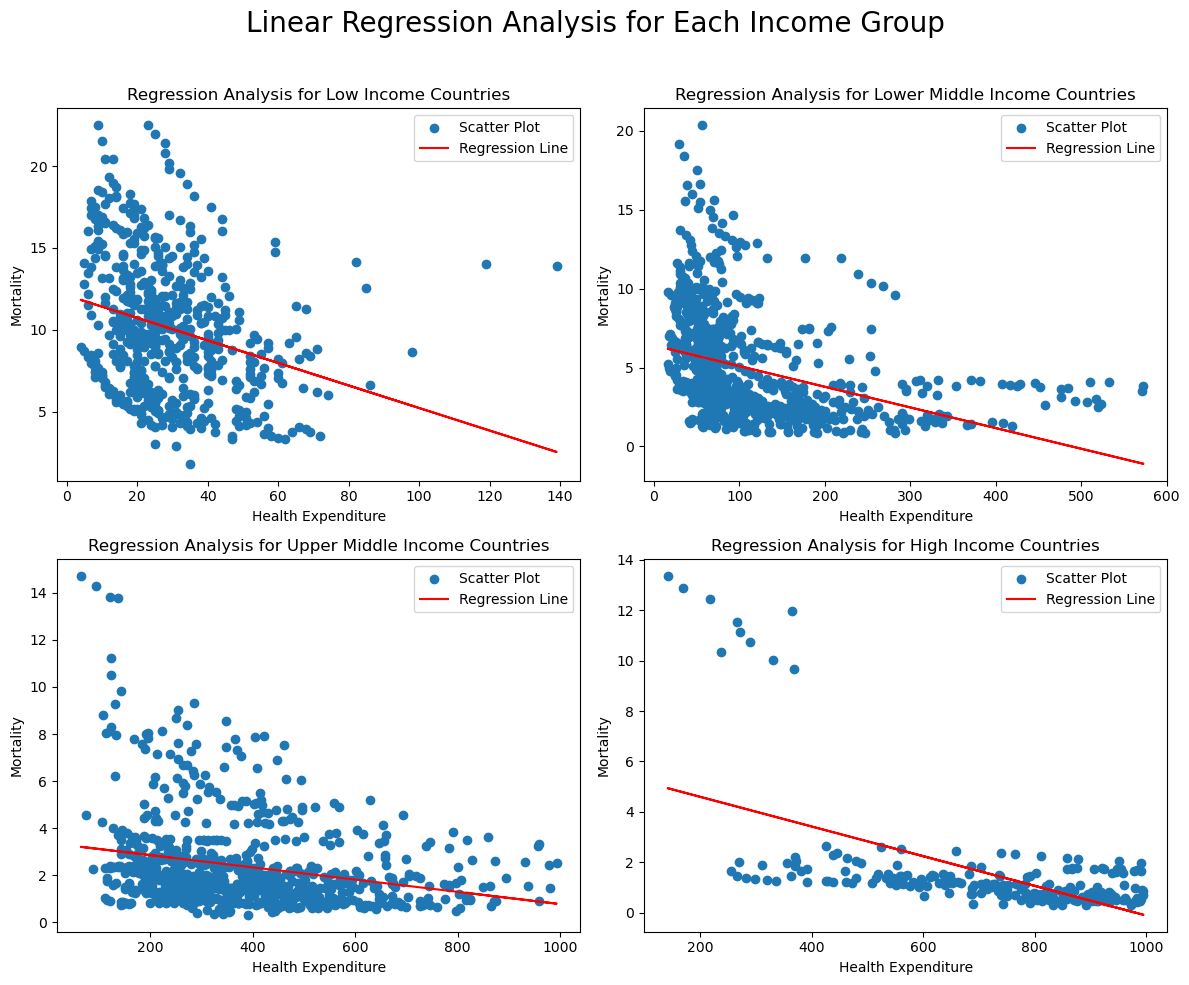

In [18]:
# Function for linear regression analysis
def linear_regression_analysis(data, income_group, ax):
    # Filter data for the specific income group
    subset_data = data[data['Income Class'] == income_group].dropna()

    # Extract independent variable (X) and dependent variable (y)
    X = subset_data['Health Expenditure'].values
    y = subset_data['Mortality'].values

    # Perform linear regression using polyfit
    m, c = np.polyfit(X, y, deg=1)

    # Plot the scatter plot and regression line
    ax.scatter(X, y, label='Scatter Plot')
    ax.plot(X, m * X + c, 'r', label='Regression Line')

    # Set labels and title
    ax.set_xlabel('Health Expenditure')
    ax.set_ylabel('Mortality')
    ax.set_title(f'Regression Analysis for {income_group} Income Countries')
    ax.legend()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Linear Regression Analysis for Each Income Group', fontsize=20)

# Perform linear regression analysis for each income group
income_groups = merged_df['Income Class'].unique().dropna()
for i, income_group in enumerate(income_groups):
    row, col = divmod(i, 2)
    linear_regression_analysis(merged_df, income_group, axs[row, col])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


# Linear Regression Analysis for each Income Group
<ul>
    <li>Both low-income class countries and lower-middle-income class countries spend between 0 and 60 USD per capita on health at some point. However, the mortality rate in low-income class countries is concentrated above 10 per 1000, while in lower-middle-income class countries, it is centered around 6 per 1000.</li>
   <li>Both lower-middle-class countries and upper-middle-income-class countries spend between 0 and 200 USD per capita on health at some point. However, the mortality rate in lower-middle-income-class countries is concentrated above 5 per 1000, while in upper-middle-income-class countries, it is concentrated below 4 per 1000.</li>
    <li>Both upper-middle-class countries and high-income-class countries spend between 0 and 1000 USD per capita on health at some point. However, the mortality rate in upper-middle-income-class countries is concentrated below 4 per 1000, while in high-income-class countries, it is concentrated below 2 per 1000.</li>
</ul>
<b>Conclusion:</b>
Although countries may spend the same amount on healthcare at a certain point, distinct differences in mortality rates emerge among different income classes. The impact of income classes on mortality rates is substantial. More economically developed countries are more likely to reduce infant mortality rates, even when spending the same amount as less developed countries. This underscores the nuanced relationship between economic development, health expenditure, and health outcomes.

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

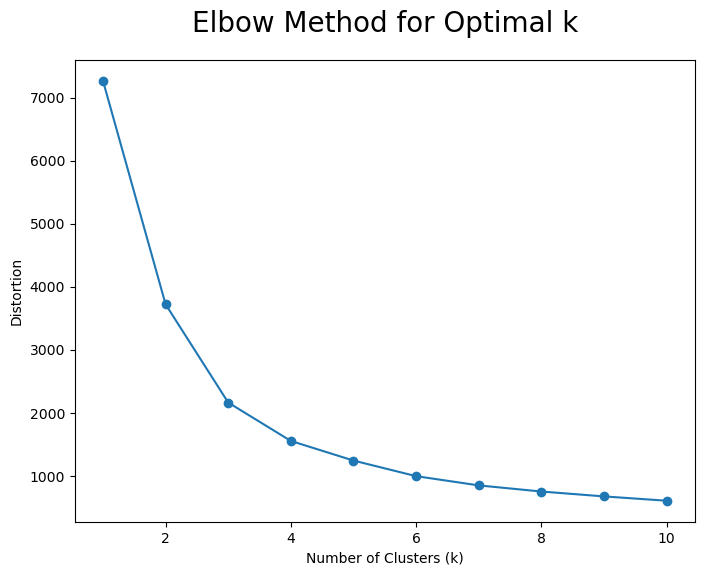

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Select relevant features
selected_features = ['Mortality', 'GDP', 'Health Expenditure']

# Extract the selected features and handle missing values
X = merged_df[selected_features].values
X = X.astype(float)  # Convert values to float to handle potential non-numeric entries
X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce').values  # Convert any non-numeric values to NaN
X = X[~np.isnan(X).any(axis=1)]  # Remove rows with NaN values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine the optimal number of clusters (k) using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_normalized)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=20, pad=20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

# Based on the elbow method, choose the optimal k
optimal_k = 3  # Adjust based on the plot

# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_normalized)

# Create a new DataFrame with only relevant columns and reset the index
cluster_df = merged_df[['Countries', 'Mortality', 'GDP', 'Health Expenditure']].copy()
cluster_df_cleaned = cluster_df.dropna().reset_index(drop=True)

# Add the cluster labels to the new DataFrame
cluster_df_cleaned['Cluster'] = cluster_labels

# Elbow Method for Optimal K
The elbow method suggests that the optimal number of clusters (K) is 3 and this also almost aligns with our number of income classes. At this point, the distortion is significantly reduced, and it ensures efficient processing.

In [20]:
# Display the resulting DataFrame with cluster labels

display(cluster_df_cleaned)

,Countries,Mortality,GDP,Health Expenditure,Cluster
0,Afghanistan,12.11,233.433,17.0,0
1,Afghanistan,11.69,233.755,18.0,0
2,Afghanistan,11.26,254.259,21.0,0
3,Afghanistan,10.84,294.396,25.0,0
4,Afghanistan,10.41,320.674,29.0,0
...,...,...,...,...,...
2417,Zimbabwe,6.13,1425.466,105.0,0
2418,Zimbabwe,5.87,1444.716,106.0,1
2419,Zimbabwe,5.70,1481.241,92.0,1
2420,Zimbabwe,5.48,2529.401,115.0,1


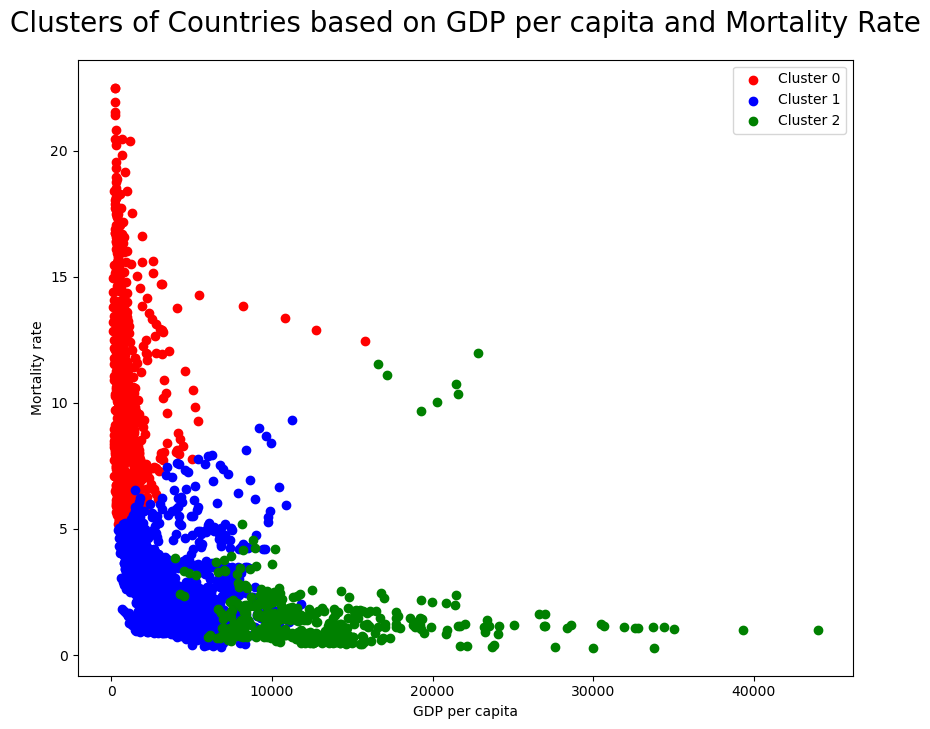

In [21]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green'} 

# Scatter plot for GDP vs Mortality colored by cluster
plt.figure(figsize=(10, 8))
for cluster, color in colors.items():
    cluster_data = cluster_df_cleaned[cluster_df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data['GDP'], cluster_data['Mortality'], label=f'Cluster {cluster}', color=color)

# Set labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Mortality rate')
plt.title('Clusters of Countries based on GDP per capita and Mortality Rate', fontsize=20, pad=20)
plt.legend()
plt.show()


# Clusters of Countries based on <br>GDP per capita and Mortality rate

<ul>
  <li><b>Cluster 1 (Blue):</b></li>
  <ul>
    <li>These countries generally exhibit lower GDP values.</li>
    <li>Mortality rates vary across a range, but there is a tendency towards higher mortality in this cluster.</li>
  </ul>
  <br>
  <li><b>CCluster 2 (Green):</b></li>
  <ul>
    <li>Countries in this cluster show moderate GDP values.</li>
    <li>Mortality rates are distributed across a range, indicating variability in health outcomes.</li>
  </ul>
  <br>
  <li><b>Cluster 0 (Red):</b></li>
  <ul>
    <li>This cluster consists of countries with higher GDP values.</li>
    <li>Mortality rates in this cluster tend to be lower, suggesting better health outcomes.</li>
  </ul>
</ul>


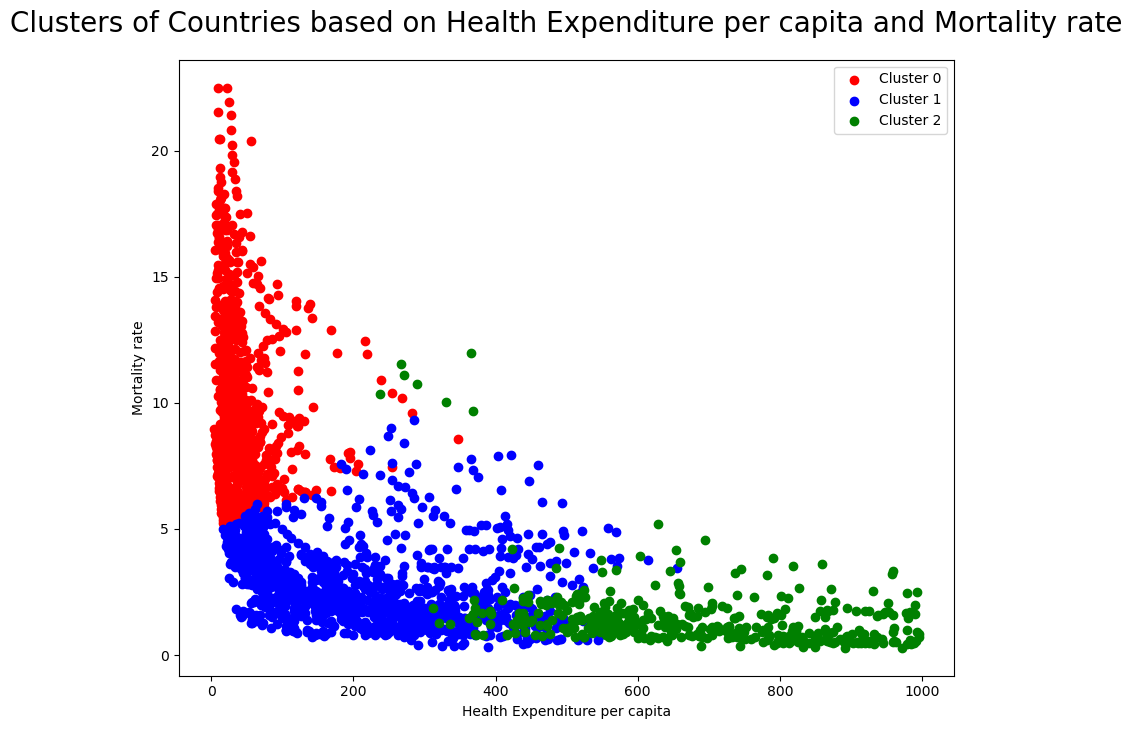

In [22]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Scatter plot for Health Expenditure vs Mortality colored by cluster
plt.figure(figsize=(10, 8))
for cluster, color in colors.items():
    cluster_data = cluster_df_cleaned[cluster_df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data['Health Expenditure'], cluster_data['Mortality'], label=f'Cluster {cluster}', color=color)

# Set labels and title
plt.xlabel('Health Expenditure per capita')
plt.ylabel('Mortality rate')
plt.title('Clusters of Countries based on Health Expenditure per capita and Mortality rate', fontsize=20, pad=20)
plt.legend()
plt.show()

# Clusters of Countries based on <br>Health Expenditure per capita and Mortality rate

<ul>
  <li><b>Cluster 1 (Blue):</b></li>
  <ul>
    <li>These countries generally have lower health expenditure.</li>
    <li>Mortality rates vary across a range, but there is a tendency towards higher mortality in this cluster.</li>
  </ul>
  <br>
  <li><b>Cluster 2 (Green):</b></li>
  <ul>
    <li>Countries in this cluster show moderate health expenditure values.</li>
    <li>Mortality rates are distributed across a range, indicating variability in health outcomes.</li>
  </ul>
  <br>
  <li><b>Cluster 0 (Red):</b></li>
  <ul>
    <li>This cluster consists of countries with higher health expenditure.</li>
    <li>Mortality rates in this cluster tend to be lower, suggesting better health outcomes.</li>
  </ul>
</ul>


# Policy Implications: 

<ul>
    <li><b>Cluster 1 (Blue):</b>
        <ul>
            <li>Increase health expenditure</li>
            <li>Enhance healthcare accessibility</li>
            <li>Reduce mortality</li>
            <li>Prioritize investments in healthcare education and preventive measures</li>
        </ul>
    </li>
    <li><b>Cluster 2 (Green):</b>
        <ul>
            <li>Tailor interventions to address specific challenges</li>
            <li>Address variability in mortality rates</li>
            <li>Implement targeted healthcare programs</li>
            <li>Improve healthcare infrastructure</li>
        </ul>
    </li>
    <li><b>Cluster 0 (Red):</b>
        <ul>
            <li>Share successful policies and practices</li>
            <li>Encourage knowledge transfer</li>
            <li>Invest in healthcare infrastructure and capacity building</li>
            <li>Maintain and improve positive health outcomes</li>
        </ul>
    </li>
</ul>
